<a href="https://colab.research.google.com/github/sohyunxxi/ML/blob/main/week7_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
class LogisticRegression:
    def __init__(self, learning_rate = 0.01, epoch=2000):
        self.learning_rate = learning_rate
        self.epoch = epoch
        self.w = []
        self.b = 0

In [13]:
def initialize_weight(self,dim):
    w = np.random.normal(0,1,(dim,1))
    b = np.random.rand(1)
    return w,b

In [14]:
def sigmoid(self,x):
  s = 1/(1 + np.exp(-x))
  return s

In [15]:
def hypothesis(self,w,X,b):
  y_hat = self.sigmoid(np.matmul(X,w)+b)
  y_hat = np.squeeze(y_hat)
  return y_hat

def cost(self,y_hat, y, N):
  cost = (-1/N)*np.sum(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))
  cost = np.squeeze(cost)
  return cost

In [16]:
  def cal_gradient(self, w, y_hat, X, y):
    N = X.shape[0]
    delta_w = (1/N)*np.matmul(X.T,(y_hat-y))
    delta_b = (1/N)*np.sum(y_hat-y)
    grads = {"delta_w":delta_w,
             "delta_b":delta_b}
    return grads

In [17]:
def gradient_position(self,w,b,X,y):
  N = X.shape[0]
  y_hat = self.hypothesis(w,X,b)
  cost = self.cost(y_hat,y,N)
  grads = self.cal_gradient(w,y_hat,X,y)
  return grads, cost

In [18]:
def gradient_descent(self,w,b,X,Y, print_cost = False):
  costs = []
  for i in range(self.epoch):
    grads, cost = self.gradient_position(w,b,X,Y)

    delta_w = grads["delta_w"]
    delta_b = grads["delta_b"]

    delta_w = delta_w.reshape(-1,1)
    w = w - (self.learning_rate * delta_w)
    b = b - (self.learning_rate * delta_b)
    if i% 100 == 0:
      costs.append(cost)

    if print_cost and i % 100 == 0:
      print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

  return params, costs

In [19]:
def predict(self,X):
  X = np.array(X)
  N = X.shape[0]

  Y_prediction = np.zeros(N)

  w = self.w.reshape(X.shape[1],1)
  b = self.b

  y_hat = self.hypothesis(w,X,b)

  for i in range(len(y_hat)):
    if y_hat[i] > 0.5:
      Y_prediction[i] = 1
    else:
      Y_prediction[i] = 0

  return Y_prediction

In [20]:
def train_model(self,X_train, Y_train, print_cost = False):
  dim = np.shape(X_train)[1]
  w, b = self.initialize_weight(dim)
  params, costs = self.gradient_descent(w, b, X_train, Y_train, print_cost = True)

  self.w = params["w"]
  self.b = params["b"]

  Y_prediction_test = self.predict(X_train)
  Y_prediction_train = self.predict(X_train)

  train_score = np.mean(Y_prediction_train == Y_train)
  test_score = np.mean(Y_prediction_test == Y_train)

  print("train accuracy: {} %".format(test_score))

  result_dict = {"costs": costs,
      "Y_prediction_test": Y_prediction_test,
      "Y_prediction_train" : Y_prediction_train,
      "w" : self.w,
      "b" : self.b,
      "learning_rate" : self.learning_rate,
      "num_iterations": self.epoch,
      "train_arccuracy": train_score,
      "test_accuracy": test_score}
  return result_dict

In [26]:
xy_data = np.load('./data_binary.npz')

X = xy_data['x']
y = xy_data['y']

train_number = int(Y.shape[0]*0.9)

X_train = X[:train_number:,:]
y_train = y[:train_number:]

X_test = X[train_number:,:]
y_test = y[train_number:]

plt.scatter(X_train[Y_train==0][:,0],
            X_train[Y_train==0][:,1],color = 'red')
plt.scatter(X_train[Y_train==1][:,0],
            X_train[Y_train==1][:,1],color = 'green')
plt.show()
plt.close()

FileNotFoundError: [Errno 2] No such file or directory: './data_binary.npz'

In [ ]:
from matplotlib.colors import ListedColormap

LR_cls = LogisticRegression()
result_dict = LR_cls.train_model(X_train,y_train, X_test, Y_test)

x1_min, x1_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
x2_min, x2_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
h = .02
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
Z = LR_cls.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cMap = ListedColormap(['red', 'green'])
plt.pcolormesh(xx, yy, Z, cmap=cMap)

plt.scatter(X_test[Y_train==0][:,0],
            X_test[Y_test==0][:,1],color ='red',edgecolor='k')
plt.scatter(X_test[Y_test==1][:,0],
            X_test[Y_test==1][:,1],color ='green',edgecolor='k')

plt.show()
plt.close()

In [ ]:
class MultiClassLogisticRegression:
    def __init__(self, lr=0.01, epoch=2000):
        self.lr = lr
        self.epoch = epoch

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, Y):
        n_samples, n_features = X.shape
        n_classes = Y.shape[1]
        self.W = np.random.randn(n_features, n_classes)
        self.b = np.zeros((1, n_classes))
        for i in range(self.epoch):
            logits = np.dot(X, self.W) + self.b
            probs = self.softmax(logits)
            loss = -np.mean(np.sum(Y * np.log(probs + 1e-8), axis=1))
            grad_W = np.dot(X.T, (probs - Y)) / n_samples
            grad_b = np.sum(probs - Y, axis=0, keepdims=True) / n_samples
            self.W -= self.lr * grad_W
            self.b -= self.lr * grad_b

    def predict(self, X):
        logits = np.dot(X, self.W) + self.b
        probs = self.softmax(logits)
        return np.argmax(probs, axis=1)

In [ ]:
# 데이터 로드 및 one-hot 인코딩
data = np.load('data_3classes.npz')
X = data['x']
y = data['y']
n_classes = int(np.max(y)) + 1
Y = np.eye(n_classes)[y.astype(int)]

In [ ]:
# 학습/테스트 분할
split = int(0.9 * len(y))
X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]
y_test = y[split:]

In [ ]:
# 모델 학습 및 예측
model = MultiClassLogisticRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

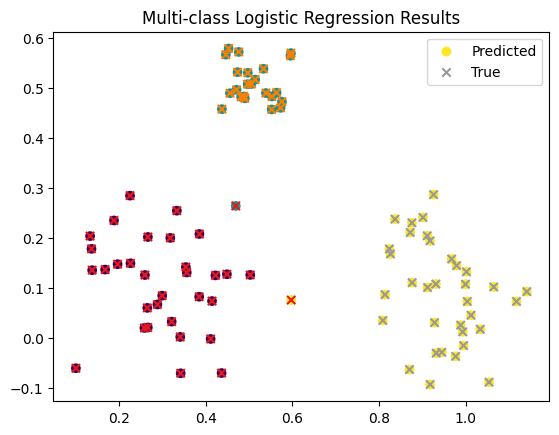

In [ ]:
# 시각화
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred, cmap='viridis', marker='o', label='Predicted')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='Set1', marker='x', label='True')
plt.legend()
plt.title('Multi-class Logistic Regression Results')
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [2]:
# 1. 데이터 불러오기 및 전처리
X, y = fetch_openml("Fashion-MNIST", version=1, return_X_y=True, as_frame=False)
X = X.astype(np.float32)
y = y.astype(int)

In [3]:
# z-score 정규화
mean = np.mean(X, axis=0)
std = np.std(X, axis=0) + 1e-8
X = (X - mean) / std

# 학습/테스트 분할
train_X, test_X = X[:-10000], X[-10000:]
train_y, test_y = y[:-10000], y[-10000:]

# One-hot 인코딩
n_classes = np.max(train_y) + 1
train_Y = np.eye(n_classes)[train_y]
test_Y = np.eye(n_classes)[test_y]

In [4]:
# 2. 소프트맥스 함수
def softmax(z):
    z -= np.max(z, axis=1, keepdims=True)
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [5]:
# 3. 로지스틱 회귀 클래스 구현
class MultiClassLogisticRegression:
    def __init__(self, lr=0.1, epoch=1000):
        self.lr = lr
        self.epoch = epoch

    def fit(self, X, Y):
        n_samples, n_features = X.shape
        n_classes = Y.shape[1]
        self.W = np.random.randn(n_features, n_classes) * 0.01
        self.b = np.zeros((1, n_classes))
        for i in range(self.epoch):
            logits = np.dot(X, self.W) + self.b
            probs = softmax(logits)
            loss = -np.mean(np.sum(Y * np.log(probs + 1e-8), axis=1))
            grad_W = np.dot(X.T, (probs - Y)) / n_samples
            grad_b = np.sum(probs - Y, axis=0, keepdims=True) / n_samples
            self.W -= self.lr * grad_W
            self.b -= self.lr * grad_b
            if i % 100 == 0:
                print(f"Epoch {i}, Loss: {loss:.4f}")

    def predict(self, X):
        logits = np.dot(X, self.W) + self.b
        probs = softmax(logits)
        return np.argmax(probs, axis=1)

In [6]:
# 4. 모델 학습 및 평가
model = MultiClassLogisticRegression(lr=0.1, epoch=1000)
model.fit(train_X, train_Y)
y_pred = model.predict(test_X)
accuracy = np.mean(y_pred == test_y)
print(f"Test accuracy: {accuracy * 100:.2f}%")

Epoch 0, Loss: 2.3091
Epoch 100, Loss: 0.4693
Epoch 200, Loss: 0.4386
Epoch 300, Loss: 0.4240
Epoch 400, Loss: 0.4149
Epoch 500, Loss: 0.4083
Epoch 600, Loss: 0.4033
Epoch 700, Loss: 0.3993
Epoch 800, Loss: 0.3959
Epoch 900, Loss: 0.3930
Test accuracy: 84.53%
